# Pandas Gradebook Project

- Load, clean, and merge data into pandas DataFrames
- Calculate with DataFrames and Series
- Map values from one set to another
- Plot summary statistics using pandas and Matplotlib

Task:
You are a teacher that needs to evaluate your students. You need to turn students’ scores into a letter grade at the end of the year. 

Focus: Create a Python script that loads your grade data and calculates letter grades for your students. This script will produce  a few plots to take a look at how the grades are distributed.

## Step 1: Exploring the data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df_hw_exam_grades = pd.read_csv("C:\\Users\\Marta Espinosa\\Desktop\\Data To Use\\hw_exam_grades.csv", on_bad_lines='skip',sep = ',',low_memory=False)
df_hw_exam_grades.head()

,First Name,Last Name,SID,Homework 1,Homework 1 - Max Points,Homework 1 - Submission Time,Homework 2,Homework 2 - Max Points,Homework 2 - Submission Time,Homework 3,...,Homework 10 - Submission Time,Exam 1,Exam 1 - Max Points,Exam 1 - Submission Time,Exam 2,Exam 2 - Max Points,Exam 2 - Submission Time,Exam 3,Exam 3 - Max Points,Exam 3 - Submission Time
0,Aaron,Lester,axl60952,68.0,80,2019-08-29 08:56:02-07:00,74,80,2019-09-05 08:56:02-07:00,77,...,2019-10-31 08:56:02-07:00,79,100,2019-10-08 12:30:07-07:00,63,100,2019-11-08 12:30:07-07:00,68,100,2019-12-08 12:30:07-07:00
1,Adam,Cooper,amc28428,80.0,80,2019-08-29 08:56:02-07:00,78,80,2019-09-05 08:56:02-07:00,78,...,2019-10-31 08:56:02-07:00,65,100,2019-10-08 12:30:07-07:00,63,100,2019-11-08 12:30:07-07:00,90,100,2019-12-08 12:30:07-07:00
2,Alec,Curry,axc64717,69.0,80,2019-08-29 08:56:02-07:00,76,80,2019-09-05 08:56:02-07:00,66,...,2019-10-31 08:56:02-07:00,65,100,2019-10-08 12:30:07-07:00,78,100,2019-11-08 12:30:07-07:00,83,100,2019-12-08 12:30:07-07:00
3,Alexander,Rodriguez,akr14831,50.0,80,2019-08-29 08:56:02-07:00,54,80,2019-09-05 08:56:02-07:00,74,...,2019-10-31 08:56:02-07:00,97,100,2019-10-08 12:30:07-07:00,97,100,2019-11-08 12:30:07-07:00,81,100,2019-12-08 12:30:07-07:00
4,Amber,Daniels,axd11293,54.0,80,2019-08-29 08:56:02-07:00,57,80,2019-09-05 08:56:02-07:00,77,...,2019-10-31 08:56:02-07:00,68,100,2019-10-08 12:30:07-07:00,95,100,2019-11-08 12:30:07-07:00,88,100,2019-12-08 12:30:07-07:00


In [3]:
df_roster = pd.read_csv("C:\\Users\\Marta Espinosa\\Desktop\\Data To Use\\roster.csv", on_bad_lines='skip',sep = ',',low_memory=False)
df_roster.head()

,ID,Name,NetID,Email Address,Section
0,1234567,"Barrera Jr., Woody",WXB12345,WOODY.BARRERA_JR@UNIV.EDU,1
1,2345678,"Lambert, Malaika",MXL12345,MALAIKA.LAMBERT@UNIV.EDU,2
2,3456789,"Joyce, Traci",TXJ12345,TRACI.JOYCE@UNIV.EDU,1
3,4567890,"Flower, John Gregg",JGF12345,JOHN.G.2.FLOWER@UNIV.EDU,3
4,8406082,"Johnson, Stacy Michael",SMJ00936,STACY.JOHNSON@UNIV.EDU,2


In [4]:
df_quiz_1_grades = pd.read_csv("C:\\Users\\Marta Espinosa\\Desktop\\Data To Use\\quiz_1_grades.csv", on_bad_lines='skip',sep = ',',low_memory=False)
df_quiz_1_grades.head()

,Last Name,First Name,Email,Grade
0,Bennett,Richard,richard.bennett@univ.edu,10
1,Parker,Timothy,timothy.parker@univ.edu,9
2,Reyes,Carol,carol.reyes@univ.edu,5
3,Powers,Brooke,brooke.powers@univ.edu,6
4,Taylor,Michael,michael.taylor@univ.edu,5


In [5]:
df_quiz_2_grades = pd.read_csv("C:\\Users\\Marta Espinosa\\Desktop\\Data To Use\\quiz_2_grades.csv", on_bad_lines='skip',sep = ',',low_memory=False)
df_quiz_2_grades.head()

,Last Name,First Name,Email,Grade
0,Anderson,Daisy,daisy.anderson@univ.edu,6
1,Flower,John,john.g.2.flower@univ.edu,8
2,Smith,Samantha,samantha.smith@univ.edu,7
3,White,Amy,amy.white@univ.edu,14
4,Delgado,Desiree,desiree.delgado@univ.edu,7


In [6]:
df_quiz_3_grades = pd.read_csv("C:\\Users\\Marta Espinosa\\Desktop\\Data To Use\\quiz_3_grades.csv", on_bad_lines='skip',sep = ',',low_memory=False)
df_quiz_3_grades.head()

,Last Name,First Name,Email,Grade
0,Thomas,Brandon,brandon.thomas@univ.edu,13
1,Flower,John,john.g.2.flower@univ.edu,8
2,Hernandez,Taylor,taylor.hernandez@univ.edu,14
3,Warren,Tamara,tamara.warren@univ.edu,16
4,Simpson,Felicia,felicia.simpson@univ.edu,13


In [7]:
df_quiz_4_grades = pd.read_csv("C:\\Users\\Marta Espinosa\\Desktop\\Data To Use\\quiz_4_grades.csv", on_bad_lines='skip',sep = ',',low_memory=False)
df_quiz_4_grades.head()

,Last Name,First Name,Email,Grade
0,Patterson,Nicole,nicole.patterson@univ.edu,13
1,Graham,Benjamin,benjamin.graham@univ.edu,6
2,Flores,Russell,russell.flores@univ.edu,9
3,Moore,Kimberly,kimberly.moore@univ.edu,8
4,Adams,Amy,amy.adams@univ.edu,8


In [8]:
df_quiz_5_grades = pd.read_csv("C:\\Users\\Marta Espinosa\\Desktop\\Data To Use\\quiz_5_grades.csv", on_bad_lines='skip',sep = ',',low_memory=False)
df_quiz_5_grades.head()

,Last Name,First Name,Email,Grade
0,Dennis,Rachel,rachel.dennis@univ.edu,11
1,Wolf,Courtney,courtney.wolf@univ.edu,9
2,Lester,Aaron,aaron.lester@univ.edu,8
3,Martin,Ashley,ashley.martin@univ.edu,11
4,Garza,Jessica,jessica.garza@univ.edu,10


## Step 2: Load and clean the Data

In [9]:
# Change NetID and email adress values to lowercase
df_roster['NetID'] = df_roster['NetID'].map(str.lower)
df_roster['Email Address'] = df_roster['Email Address'].map(str.lower)
df_roster.head()

,ID,Name,NetID,Email Address,Section
0,1234567,"Barrera Jr., Woody",wxb12345,woody.barrera_jr@univ.edu,1
1,2345678,"Lambert, Malaika",mxl12345,malaika.lambert@univ.edu,2
2,3456789,"Joyce, Traci",txj12345,traci.joyce@univ.edu,1
3,4567890,"Flower, John Gregg",jgf12345,john.g.2.flower@univ.edu,3
4,8406082,"Johnson, Stacy Michael",smj00936,stacy.johnson@univ.edu,2


In [10]:
# Keep only the necessary columns (section, email address, NetID)
df_roster = df_roster[['Section', 'Email Address', 'NetID']]
df_roster.head()

,Section,Email Address,NetID
0,1,woody.barrera_jr@univ.edu,wxb12345
1,2,malaika.lambert@univ.edu,mxl12345
2,1,traci.joyce@univ.edu,txj12345
3,3,john.g.2.flower@univ.edu,jgf12345
4,2,stacy.johnson@univ.edu,smj00936


In [128]:
# Set the index column as NetID.
df_roster.set_index('NetID', inplace=True)
df_roster.head()

,Section,Email Address
NetID,,
wxb12345,1,woody.barrera_jr@univ.edu
mxl12345,2,malaika.lambert@univ.edu
txj12345,1,traci.joyce@univ.edu
jgf12345,3,john.g.2.flower@univ.edu
smj00936,2,stacy.johnson@univ.edu


In [16]:
# hw_exam_grades df: convert SID to lower case, remove unnessecary columns, set the index column as SID)
df_hw_exam_grades.rename(columns={'SID': 'sid'}, inplace=True)
df_hw_exam_grades.drop(df_hw_exam_grades.filter(regex='Submission').columns, axis=1, inplace=True)
df_hw_exam_grades.set_index('sid')
df_hw_exam_grades.head()

,First Name,Last Name,sid,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
0,Aaron,Lester,axl60952,68.0,80,74,80,77,80,89,...,42,60,41,60,79,100,63,100,68,100
1,Adam,Cooper,amc28428,80.0,80,78,80,78,80,87,...,45,60,53,60,65,100,63,100,90,100
2,Alec,Curry,axc64717,69.0,80,76,80,66,80,87,...,58,60,42,60,65,100,78,100,83,100
3,Alexander,Rodriguez,akr14831,50.0,80,54,80,74,80,75,...,38,60,47,60,97,100,97,100,81,100
4,Amber,Daniels,axd11293,54.0,80,57,80,77,80,95,...,46,60,59,60,68,100,95,100,88,100


In [27]:
# Load in the 5 separate files and combine them together to form one dataframe.

new_df_quiz_1_grades = df_quiz_1_grades.drop(columns =['Last Name', 'First Name'])
new_df_quiz_2_grades = df_quiz_2_grades.drop(columns =['Last Name', 'First Name'])
new_df_quiz_3_grades= df_quiz_3_grades.drop(columns =['Last Name', 'First Name'])
new_df_quiz_4_grades = df_quiz_4_grades.drop(columns =['Last Name', 'First Name'])
new_df_quiz_5_grades = df_quiz_5_grades.drop(columns =['Last Name', 'First Name'])

In [40]:
quiz_df = pd.merge(new_df_quiz_1_grades, new_df_quiz_2_grades, on = "Email")
quiz_df = quiz_df.join(new_df_quiz_3_grades["Grade"])
quiz_df_2 = pd.merge(new_df_quiz_4_grades, new_df_quiz_5_grades, on = "Email")
quiz_df_final = pd.merge(quiz_df, quiz_df_2, on = "Email")
quiz_df_final

,Email,Grade_x_x,Grade_y_x,Grade,Grade_x_y,Grade_y_y
0,richard.bennett@univ.edu,10,6,13,8,10
1,timothy.parker@univ.edu,9,14,8,14,10
2,carol.reyes@univ.edu,5,15,14,14,6
3,brooke.powers@univ.edu,6,10,16,10,8
4,michael.taylor@univ.edu,5,15,13,12,5
...,...,...,...,...,...,...
145,jeffrey.perez@univ.edu,4,7,12,12,9
146,angela.dunlap@univ.edu,6,11,8,11,6
147,richard.elliott@univ.edu,6,13,11,11,12
148,donna.nguyen@univ.edu,7,12,13,9,4


In [43]:
#Rename the columns
quiz_df_final.rename(columns={'Grade_x_x': 'Quiz 1', 'Grade_y_x': 'Quiz 2','Grade': "Quiz 3", "Grade_x_y":"Quiz 4",
                              'Grade_y_y': 'Quiz 5' },inplace=True)

KeyError: "['Grade_x_x', 'Grade_y_x', 'Grade', 'Grade_x_y', 'Grade_y_y'] not found in axis"

In [45]:
quiz_df_final.head()



,Email,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
0,richard.bennett@univ.edu,10,6,13,8,10
1,timothy.parker@univ.edu,9,14,8,14,10
2,carol.reyes@univ.edu,5,15,14,14,6
3,brooke.powers@univ.edu,6,10,16,10,8
4,michael.taylor@univ.edu,5,15,13,12,5


In [50]:
quiz_df_final.rename(columns={'Email': 'Email Address'}, inplace = True)
quiz_df_final

,Email Address,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
0,richard.bennett@univ.edu,10,6,13,8,10
1,timothy.parker@univ.edu,9,14,8,14,10
2,carol.reyes@univ.edu,5,15,14,14,6
3,brooke.powers@univ.edu,6,10,16,10,8
4,michael.taylor@univ.edu,5,15,13,12,5
...,...,...,...,...,...,...
145,jeffrey.perez@univ.edu,4,7,12,12,9
146,angela.dunlap@univ.edu,6,11,8,11,6
147,richard.elliott@univ.edu,6,13,11,11,12
148,donna.nguyen@univ.edu,7,12,13,9,4


In [51]:
merged_df = pd.merge(df_roster, quiz_df_final, on = "Email Address") 
merged_df

,Section,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
0,1,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10
1,2,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6
2,1,traci.joyce@univ.edu,txj12345,8,6,8,9,4
3,3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5
4,2,stacy.johnson@univ.edu,smj00936,6,14,7,7,7
...,...,...,...,...,...,...,...,...
145,3,paul.johnson@univ.edu,pmj37756,10,14,6,11,10
146,3,danielle.lee@univ.edu,dsl24347,7,14,17,5,7
147,3,nicole.edwards@univ.edu,nxe44872,10,12,10,12,10
148,2,bailey.reyes@univ.edu,bxr62103,10,15,17,6,7


In [52]:
df_hw_exam_grades.rename(columns={'sid': 'NetID'}, inplace = True)


,First Name,Last Name,NetID,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
0,Aaron,Lester,axl60952,68.0,80,74,80,77,80,89,...,42,60,41,60,79,100,63,100,68,100
1,Adam,Cooper,amc28428,80.0,80,78,80,78,80,87,...,45,60,53,60,65,100,63,100,90,100
2,Alec,Curry,axc64717,69.0,80,76,80,66,80,87,...,58,60,42,60,65,100,78,100,83,100
3,Alexander,Rodriguez,akr14831,50.0,80,54,80,74,80,75,...,38,60,47,60,97,100,97,100,81,100
4,Amber,Daniels,axd11293,54.0,80,57,80,77,80,95,...,46,60,59,60,68,100,95,100,88,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Travis,Washington,txw75701,64.0,80,67,80,56,80,92,...,40,60,52,60,94,100,74,100,68,100
146,Troy,Raymond,tbr17292,50.0,80,59,80,79,80,98,...,45,60,49,60,91,100,67,100,100,100
147,Victoria,Boyd,vkb66346,58.0,80,61,80,75,80,99,...,40,60,50,60,68,100,93,100,69,100
148,William,Daniel,wad63934,48.0,80,60,80,72,80,76,...,51,60,36,60,84,100,91,100,95,100


In [58]:
df_hw_exam_grades.drop('Last Name', axis =1, inplace=True)  
df_hw_exam_grades.drop('First Name', axis =1, inplace=True)  

In [59]:
df_hw_exam_grades

,NetID,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,Homework 5,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
0,axl60952,68.0,80,74,80,77,80,89,100,51,...,42,60,41,60,79,100,63,100,68,100
1,amc28428,80.0,80,78,80,78,80,87,100,65,...,45,60,53,60,65,100,63,100,90,100
2,axc64717,69.0,80,76,80,66,80,87,100,59,...,58,60,42,60,65,100,78,100,83,100
3,akr14831,50.0,80,54,80,74,80,75,100,54,...,38,60,47,60,97,100,97,100,81,100
4,axd11293,54.0,80,57,80,77,80,95,100,47,...,46,60,59,60,68,100,95,100,88,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,txw75701,64.0,80,67,80,56,80,92,100,50,...,40,60,52,60,94,100,74,100,68,100
146,tbr17292,50.0,80,59,80,79,80,98,100,65,...,45,60,49,60,91,100,67,100,100,100
147,vkb66346,58.0,80,61,80,75,80,99,100,52,...,40,60,50,60,68,100,93,100,69,100
148,wad63934,48.0,80,60,80,72,80,76,100,65,...,51,60,36,60,84,100,91,100,95,100


In [60]:
merged_df_final = pd.merge(merged_df, df_hw_exam_grades, on = "NetID") 
merged_df_final

,Section,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
0,1,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,...,45,60,46,60,86,100,62,100,90,100
1,2,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,...,45,60,37,60,60,100,91,100,93,100
2,1,traci.joyce@univ.edu,txj12345,8,6,8,9,4,NaN,80,...,59,60,53,60,100,100,84,100,64,100
3,3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,...,42,60,40,60,72,100,83,100,77,100
4,2,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,...,59,60,48,60,96,100,80,100,86,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,3,paul.johnson@univ.edu,pmj37756,10,14,6,11,10,73.0,80,...,40,60,51,60,84,100,80,100,94,100
146,3,danielle.lee@univ.edu,dsl24347,7,14,17,5,7,69.0,80,...,49,60,57,60,62,100,70,100,90,100
147,3,nicole.edwards@univ.edu,nxe44872,10,12,10,12,10,62.0,80,...,58,60,51,60,89,100,63,100,65,100
148,2,bailey.reyes@univ.edu,bxr62103,10,15,17,6,7,53.0,80,...,41,60,46,60,90,100,72,100,71,100


In [61]:
merged_df_final.drop('Section', axis =1, inplace=True) 
merged_df_final

,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,Homework 2,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
0,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,62,...,45,60,46,60,86,100,62,100,90,100
1,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,57,...,45,60,37,60,60,100,91,100,93,100
2,traci.joyce@univ.edu,txj12345,8,6,8,9,4,NaN,80,77,...,59,60,53,60,100,100,84,100,64,100
3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,52,...,42,60,40,60,72,100,83,100,77,100
4,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,55,...,59,60,48,60,96,100,80,100,86,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,paul.johnson@univ.edu,pmj37756,10,14,6,11,10,73.0,80,50,...,40,60,51,60,84,100,80,100,94,100
146,danielle.lee@univ.edu,dsl24347,7,14,17,5,7,69.0,80,51,...,49,60,57,60,62,100,70,100,90,100
147,nicole.edwards@univ.edu,nxe44872,10,12,10,12,10,62.0,80,76,...,58,60,51,60,89,100,63,100,65,100
148,bailey.reyes@univ.edu,bxr62103,10,15,17,6,7,53.0,80,50,...,41,60,46,60,90,100,72,100,71,100


In [73]:
# Fill in NAN values
final_data = merged_df_final.fillna(0)
final_data

,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,Homework 2,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
0,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,62,...,45,60,46,60,86,100,62,100,90,100
1,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,57,...,45,60,37,60,60,100,91,100,93,100
2,traci.joyce@univ.edu,txj12345,8,6,8,9,4,0.0,80,77,...,59,60,53,60,100,100,84,100,64,100
3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,52,...,42,60,40,60,72,100,83,100,77,100
4,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,55,...,59,60,48,60,96,100,80,100,86,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,paul.johnson@univ.edu,pmj37756,10,14,6,11,10,73.0,80,50,...,40,60,51,60,84,100,80,100,94,100
146,danielle.lee@univ.edu,dsl24347,7,14,17,5,7,69.0,80,51,...,49,60,57,60,62,100,70,100,90,100
147,nicole.edwards@univ.edu,nxe44872,10,12,10,12,10,62.0,80,76,...,58,60,51,60,89,100,63,100,65,100
148,bailey.reyes@univ.edu,bxr62103,10,15,17,6,7,53.0,80,50,...,41,60,46,60,90,100,72,100,71,100


## Step 3: Calculating Grades

### Calculating the Exam Total Score

In [87]:
for n in range(1,4):
    final_data[f'Exam {n} Score'] = final_data[f'Exam {n}']/ final_data[f'Exam {n} - Max Points']
final_data

,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,Homework 2,...,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Exam 1 Score,Exam 2 Score,Exam 3 Score
0,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,62,...,60,86,100,62,100,90,100,0.86,0.62,0.90
1,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,57,...,60,60,100,91,100,93,100,0.60,0.91,0.93
2,traci.joyce@univ.edu,txj12345,8,6,8,9,4,0.0,80,77,...,60,100,100,84,100,64,100,1.00,0.84,0.64
3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,52,...,60,72,100,83,100,77,100,0.72,0.83,0.77
4,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,55,...,60,96,100,80,100,86,100,0.96,0.80,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,paul.johnson@univ.edu,pmj37756,10,14,6,11,10,73.0,80,50,...,60,84,100,80,100,94,100,0.84,0.80,0.94
146,danielle.lee@univ.edu,dsl24347,7,14,17,5,7,69.0,80,51,...,60,62,100,70,100,90,100,0.62,0.70,0.90
147,nicole.edwards@univ.edu,nxe44872,10,12,10,12,10,62.0,80,76,...,60,89,100,63,100,65,100,0.89,0.63,0.65
148,bailey.reyes@univ.edu,bxr62103,10,15,17,6,7,53.0,80,50,...,60,90,100,72,100,71,100,0.90,0.72,0.71


In [89]:
Exam_Total_Score_df = final_data[['NetID', 'Exam 1 Score','Exam 2 Score','Exam 3 Score']].copy()
Exam_Total_Score_df.head()

,NetID,Exam 1 Score,Exam 2 Score,Exam 3 Score
0,wxb12345,0.86,0.62,0.90
1,mxl12345,0.60,0.91,0.93
2,txj12345,1.00,0.84,0.64
3,jgf12345,0.72,0.83,0.77
4,smj00936,0.96,0.80,0.86


In [ ]:
# At the end of the script, multiply these scores by the weight to determine the proportion of the final grade.

### Calculating the Homework Scores

In [96]:
# 1. Collect the columns with homework data (using .filter() with regex )
homework_scores = final_data.filter(regex=r"^Homework \d\d?$", axis=1)
homework_max_points = final_data.filter(regex=r"^Homework \d\d? -", axis=1)
homework_scores.head()

,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,Homework 7,Homework 8,Homework 9,Homework 10
0,55.0,62,73,83,68,87,36,43,45,46
1,63.0,57,78,83,61,88,42,58,45,37
2,0.0,77,58,91,66,78,30,69,59,53
3,69.0,52,64,75,61,83,41,43,42,40
4,74.0,55,60,67,46,85,43,42,59,48


In [100]:
# 2. Compute the total score.
sum_of_hw_scores = homework_scores.sum(axis=1)
sum_of_hw_max = homework_max_points.sum(axis=1)
Total_Homework = final_data["Total Homework"] = sum_of_hw_scores / sum_of_hw_max
sum_of_hw_scores

0      598.0
1      612.0
2      581.0
3      570.0
4      579.0
       ...  
145    544.0
146    609.0
147    621.0
148    577.0
149    556.0
Length: 150, dtype: float64

In [99]:
sum_of_hw_max

0      740
1      740
2      740
3      740
4      740
      ... 
145    740
146    740
147    740
148    740
149    740
Length: 150, dtype: int64

In [102]:
Total_Homework

0      0.808108
1      0.827027
2      0.785135
3      0.770270
4      0.782432
         ...   
145    0.735135
146    0.822973
147    0.839189
148    0.779730
149    0.751351
Length: 150, dtype: float64

In [106]:
final_data.head()

,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,Homework 2,...,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework
0,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,62,...,86,100,62,100,90,100,0.86,0.62,0.90,0.808108
1,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,57,...,60,100,91,100,93,100,0.60,0.91,0.93,0.827027
2,traci.joyce@univ.edu,txj12345,8,6,8,9,4,0.0,80,77,...,100,100,84,100,64,100,1.00,0.84,0.64,0.785135
3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,52,...,72,100,83,100,77,100,0.72,0.83,0.77,0.770270
4,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,55,...,96,100,80,100,86,100,0.96,0.80,0.86,0.782432


In [108]:
# Change the column names for homework_max_points to match the names in homework_scores
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)
final_data["Average Homework"] = average_hw_scores / homework_scores.shape[1]

In [109]:
# Take the maximum value to be used in the final grade calculation:
final_data["Homework Score"] = final_data[["Total Homework", "Average Homework"]].max(axis=1)

In [110]:
final_data.head()

,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,Homework 2,...,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score
0,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,62,...,62,100,90,100,0.86,0.62,0.90,0.808108,0.799405,0.808108
1,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,57,...,91,100,93,100,0.60,0.91,0.93,0.827027,0.818944,0.827027
2,traci.joyce@univ.edu,txj12345,8,6,8,9,4,0.0,80,77,...,84,100,64,100,1.00,0.84,0.64,0.785135,0.785940,0.785940
3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,52,...,83,100,77,100,0.72,0.83,0.77,0.770270,0.765710,0.770270
4,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,55,...,80,100,86,100,0.96,0.80,0.86,0.782432,0.787742,0.787742


### Calculating the Quiz Score

In [111]:
quiz_scores = final_data.filter(regex=r"^Quiz \d$", axis=1)
quiz_max_points = pd.Series({"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12})

In [112]:
quiz_scores

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
0,4,10,15,7,10
1,8,10,10,13,6
2,8,6,8,9,4
3,8,8,9,13,5
4,6,14,7,7,7
...,...,...,...,...,...
145,10,14,6,11,10
146,7,14,17,5,7
147,10,12,10,12,10
148,10,15,17,6,7


In [114]:
quiz_max_points

Quiz 1    11
Quiz 2    15
Quiz 3    17
Quiz 4    14
Quiz 5    12
dtype: int64

In [115]:
sum_of_quiz_scores = quiz_scores.sum(axis=1)
sum_of_quiz_max = quiz_max_points.sum()
final_data["Total Quizzes"] = sum_of_quiz_scores / sum_of_quiz_max

average_quiz_scores = (quiz_scores / quiz_max_points).sum(axis=1)
final_data["Average Quizzes"] = average_quiz_scores / quiz_scores.shape[1]

final_data["Quiz Score"] = final_data[["Total Quizzes", "Average Quizzes"]].max(axis=1)

In [116]:
final_data.head()

,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,Homework 2,...,Exam 3 - Max Points,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Total Quizzes,Average Quizzes,Quiz Score
0,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,62,...,100,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.666667,0.649198,0.666667
1,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,57,...,100,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149
2,traci.joyce@univ.edu,txj12345,8,6,8,9,4,0.0,80,77,...,100,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.507246,0.514810,0.514810
3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,52,...,100,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.623188,0.627051,0.627051
4,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,55,...,100,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.594203,0.594777,0.594777


### Calculating the Letter Grade

Multiply each score by its weighting to determine the final grade. 
Then map that value onto a scale for letter grades, A through F.

In [117]:
weightings = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,
    }
)

In [118]:
final_data["Final Score"] = (final_data[weightings.index] * weightings).sum(axis=1)
# Round each student’s grade up
final_data["Ceiling Score"] = np.ceil(final_data["Final Score"] * 100)

In [119]:
final_data.head()

,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,Homework 2,...,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Total Quizzes,Average Quizzes,Quiz Score,Final Score,Ceiling Score
0,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,62,...,0.62,0.90,0.808108,0.799405,0.808108,0.666667,0.649198,0.666667,0.763243,77.0
1,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,57,...,0.91,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149,0.795956,80.0
2,traci.joyce@univ.edu,txj12345,8,6,8,9,4,0.0,80,77,...,0.84,0.64,0.785135,0.785940,0.785940,0.507246,0.514810,0.514810,0.698819,70.0
3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,52,...,0.83,0.77,0.770270,0.765710,0.770270,0.623188,0.627051,0.627051,0.730723,74.0
4,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,55,...,0.80,0.86,0.782432,0.787742,0.787742,0.594203,0.594777,0.594777,0.750530,76.0


The last thing to do is to map each student’s ceiling score onto a letter grade. At the school, they use these letter grades:
- A: Score of 90 or higher
- B: Score between 80 and 90
- C: Score between 70 and 80
- D: Score between 60 and 70
- F: Score below 60

In [120]:
grades = {
    90: "A",
    80: "B",
    70: "C",
    60: "D",
    0: "F",
}

def grade_mapping(value):
    for key, letter in grades.items():
        if value >= key:
            return letter

In [121]:
letter_grades = final_data["Ceiling Score"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(letter_grades, categories=grades.values(), ordered=True)

In [122]:
final_data.head()

,Email Address,NetID,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Homework 1,Homework 1 - Max Points,Homework 2,...,Exam 3 Score,Total Homework,Average Homework,Homework Score,Total Quizzes,Average Quizzes,Quiz Score,Final Score,Ceiling Score,Final Grade
0,woody.barrera_jr@univ.edu,wxb12345,4,10,15,7,10,55.0,80,62,...,0.90,0.808108,0.799405,0.808108,0.666667,0.649198,0.666667,0.763243,77.0,C
1,malaika.lambert@univ.edu,mxl12345,8,10,10,13,6,63.0,80,57,...,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149,0.795956,80.0,B
2,traci.joyce@univ.edu,txj12345,8,6,8,9,4,0.0,80,77,...,0.64,0.785135,0.785940,0.785940,0.507246,0.514810,0.514810,0.698819,70.0,C
3,john.g.2.flower@univ.edu,jgf12345,8,8,9,13,5,69.0,80,52,...,0.77,0.770270,0.765710,0.770270,0.623188,0.627051,0.627051,0.730723,74.0,C
4,stacy.johnson@univ.edu,smj00936,6,14,7,7,7,74.0,80,55,...,0.86,0.782432,0.787742,0.787742,0.594203,0.594777,0.594777,0.750530,76.0,C


## Step 4: Plotting Summary Statistics

<AxesSubplot:>

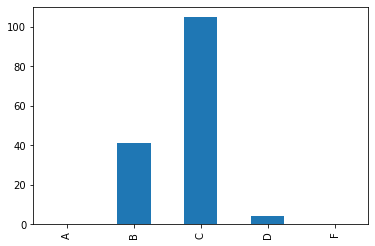

In [124]:
grade_counts = final_data["Final Grade"].value_counts().sort_index()
grade_counts.plot.bar()

<AxesSubplot:ylabel='Frequency'>

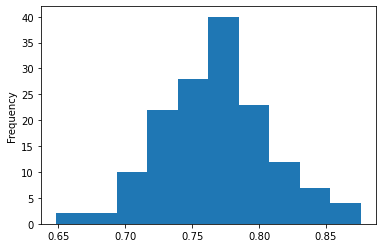

In [127]:
final_data["Final Score"].plot.hist(bins=10, label="Histogram")